In [6]:
import pandas as pd
import preprocessing as pp
import utils as utils
import numpy as np
from sklearn.naive_bayes import CategoricalNB, GaussianNB
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

In [7]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [8]:
X, y = utils.importar_datos()

### Métricas finales

Se eligió el modelo que utiliza un ensamble de Stacking dado que, si bien el CV dió un poco peor que en el primer modelo del notebook, la diferencia es despreciable. Además al ser un ensamble, el algoritmo puede generalizar mejor.

In [9]:
pipeline_gaussian = Pipeline([("preprocessor", pp.PreprocessingGaussianNB1()), 
                              ("model", GaussianNB(var_smoothing=0.01))
                     ])
pipeline_categorical = Pipeline([("preprocessor", pp.PreprocessingCategoricalNB3()), 
                              ("model", CategoricalNB(alpha=2))
                     ])
estimadores = [('categorical_nb', pipeline_categorical), ('gaussian_nb', pipeline_gaussian)]
cv = utils.kfold_for_cross_validation()

stacked_naive_bayes = StackingClassifier(estimators=estimadores, final_estimator=GaussianNB(), stack_method="predict_proba", cv=cv)

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.880870,0.809917,0.870968,0.586957,0.701299


Matriz de confusión:


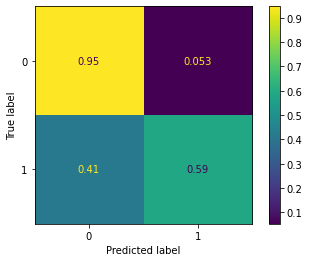

In [10]:
stacked_naive_bayes = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, stacked_naive_bayes)

La métrica objetivo AUC-ROC es mejor por la obtenida por el modelo de NaiveBayes que utiliza LabelEncoder. Sin embargo, la tasa de Falsos Negativos supera por 6 puntos a la de dicho modelo, por eso es muy bajo el resultado de Recall.

### Predicción HoldOut

In [ ]:
utils.predecir_holdout_y_generar_csv(stacked_naive_bayes, 'Predicciones/3-NaiveBayes-OHE.csv')